<a href="https://colab.research.google.com/github/Longbuivu/Artifical-Intelligence/blob/main/2_Dof_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import math
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten,LeakyReLU
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [9]:
data_robot = []
l1 = 50
l2 = 40
#l3 = 20
#phi = theta1 +theta2 + theta3
for theta1 in range (-90,90):
  for theta2 in range (-90,90):
    px = l1*np.cos(np.radians(theta1)) + l2*np.cos(np.radians(theta1 + theta2))
    py = l1*np.sin(np.radians(theta1)) + l2*np.sin(np.radians(theta1 + theta2))
    data_robot.append([theta1,theta2,px,py])
data = pd.DataFrame(data_robot,columns=['theta1','theta2','Px','Py'])
data

,theta1,theta2,Px,Py
0,-90,-90,-40.000000,-50.000000
1,-90,-89,-39.993908,-50.698096
2,-90,-88,-39.975633,-51.395980
3,-90,-87,-39.945181,-52.093438
4,-90,-86,-39.902562,-52.790259
...,...,...,...,...
32395,89,85,-38.908255,54.173523
32396,89,86,-38.975168,53.478614
32397,89,87,-39.029942,52.782644
32398,89,88,-39.072561,52.085823


In [10]:
Y_df=data.drop(['Px','Py'],axis =1)
X_df=data.drop(['theta1','theta2'],axis =1)
print(X_df.shape,Y_df.shape)

(32400, 2) (32400, 2)


In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X_df,Y_df,test_size=0.25,random_state =7)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
Y_train.head(5)

(24300, 2) (24300, 2) (8100, 2) (8100, 2)


,theta1,theta2
20563,24,-47
5732,-59,62
31971,87,21
31134,82,84
8768,-42,38


In [12]:
model = Sequential()
model.add(Dense(256,LeakyReLU(), input_shape = (2,)))
model.add(Dense(256,LeakyReLU()))
model.add(Dropout(0.2))
model.add(Dense(256,LeakyReLU()))
model.add(Dense(256,LeakyReLU()))
model.add(Dropout(0.2))
model.add(Dense(256,LeakyReLU()))
model.add(Dense(256,LeakyReLU()))
model.add(Dropout(0.2))
model.add(Dense(256,LeakyReLU()))
model.add(Dense(2))
model.summary()

opt = SGD(lr=0.001,momentum=0.1) #toc do hoc 0.01, momen dong luong 0.9 'Ftrl'
model.compile(loss='mse',optimizer=opt,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               768       
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history=model.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
760/760 [==============================] - 7s 8ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.5014
Epoch 2/10
760/760 [==============================] - 6s 8ms/step - loss: nan - accuracy: 0.5033 - val_loss: nan - val_accuracy: 0.5014
Epoch 3/10
760/760 [==============================] - 6s 7ms/step - loss: nan - accuracy: 0.5033 - val_loss: nan - val_accuracy: 0.5014
Epoch 4/10
760/760 [==============================] - 6s 8ms/step - loss: nan - accuracy: 0.5033 - val_loss: nan - val_accuracy: 0.5014
Epoch 5/10
760/760 [==============================] - 6s 8ms/step - loss: nan - accuracy: 0.5033 - val_loss: nan - val_accuracy: 0.5014
Epoch 6/10
760/760 [==============================] - 6s 8ms/step - loss: nan - accuracy: 0.5033 - val_loss: nan - val_accuracy: 0.5014
Epoch 7/10
760/760 [==============================] - 6s 8ms/step - loss: nan - accuracy: 0.5033 - val_loss: nan - val_accuracy: 0.5014
Epoch 8/10
760/760 [============================

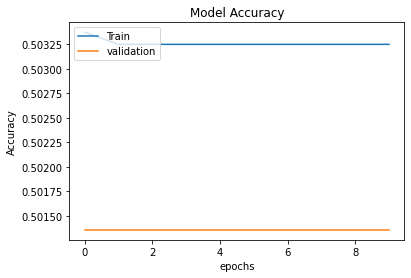

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [15]:
model.save('/content/drive/MyDrive/AI/2DOF Robot/2dof_robot.h5')

In [16]:

model_test=load_model('/content/drive/MyDrive/AI/2DOF Robot/2dof_robot.h5')

In [ ]:
#test
asd = np.array([[50,40],[0,90]])
y_predict = model_test.predict(asd)
print(y_predict)